# Noise Removal and PSNR in Medical Images

## Objective
To study how noise affects medical images and how basic filtering techniques can reduce noise.
PSNR is used as a quantitative metric to evaluate image quality.

This notebook focuses on understanding preprocessing behavior and limitations,
not on clinical diagnosis or model training.


In [4]:
#Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr


- `import cv2`  
  Imports OpenCV, which provides image reading, color conversion, and filtering functions.

- `import numpy as np`  
  Imports NumPy for numerical operations such as array handling and noise generation.

- `import matplotlib.pyplot as plt`  
  Imports Matplotlib’s plotting module for visualizing images at different stages.

- `from skimage.metrics import peak_signal_noise_ratio as psnr`  
  Imports the PSNR function, which quantitatively measures image quality degradation and improvement.


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Chest X-Ray Images.jpeg to Chest X-Ray Images (1).jpeg


- `from google.colab import files`  
  Imports the Colab utility that allows file upload from the local system.

- `uploaded = files.upload()`  
  Opens a file selection dialog and uploads the chosen image into the Colab runtime.
  The uploaded file is stored as a dictionary with filenames as keys.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

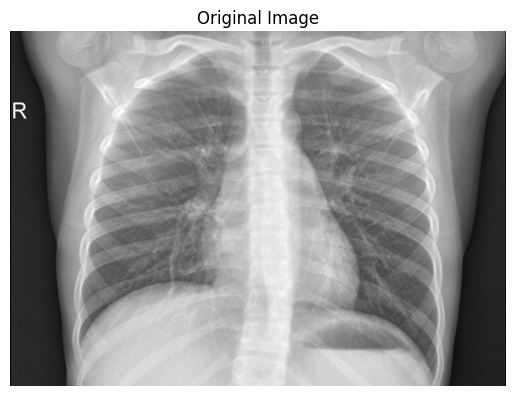

In [6]:
#Read and Display Original Image
img = cv2.imread(list(uploaded.keys())[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


- `list(uploaded.keys())[0]`  
  Retrieves the filename of the uploaded image.

- `cv2.imread(...)`  
  Reads the image from disk into memory as a NumPy array.

- `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`  
  Converts the image from BGR format (used by OpenCV) to RGB format for correct visualization.

- `plt.imshow(img_rgb)`  
  Displays the image.

- `plt.title("Original Image")`  
  Adds a title for clarity.

- `plt.axis("off")`  
  Removes axis ticks to focus attention on image content.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

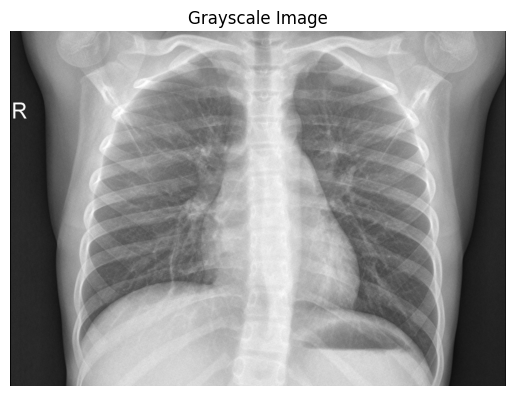

In [7]:
#Convert Image to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")


- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`  
  Converts the multi-channel image into a single-channel grayscale image.

Medical imaging tasks often rely on intensity information, not color.

Grayscale conversion:
- Reduces dimensionality
- Simplifies computation
- Preserves anatomical structure
- Ensures compatibility with single-channel filtering methods

- `plt.imshow(gray, cmap='gray')`  
  Displays the grayscale image using a grayscale colormap.

- `plt.title("Grayscale Image")`  
  Labels the displayed image.

- `plt.axis("off")`  
  Removes axes for cleaner visualization.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

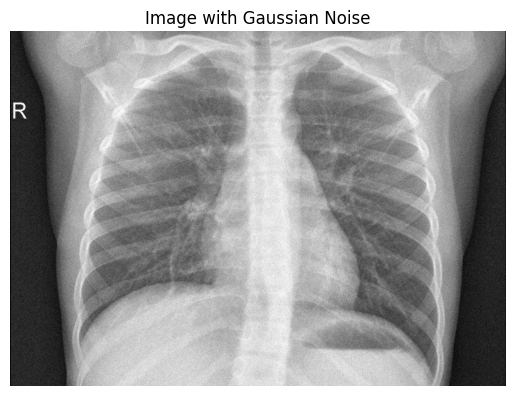

In [8]:
#Add Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=20):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy = image + gaussian
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

noisy_img = add_gaussian_noise(gray)

plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis("off")


- `def add_gaussian_noise(image, mean=0, sigma=20):`  
  Defines a function to add Gaussian noise to an image.

- `np.random.normal(mean, sigma, image.shape)`  
  Generates random noise with a normal distribution matching the image dimensions.

- `image + gaussian`  
  Adds noise to the original image pixel values.

- `np.clip(noisy, 0, 255)`  
  Ensures pixel values remain within valid grayscale range.

- `.astype(np.uint8)`  
  Converts pixel values to 8-bit unsigned integers.

- `return noisy`  
  Returns the noisy image.
- `add_gaussian_noise(gray)`  
  Applies controlled Gaussian noise to the grayscale image.

- `plt.imshow(noisy_img, cmap='gray')`  
  Displays the noisy image.

- `plt.title("Image with Gaussian Noise")`  
  Labels the visualization.

- `plt.axis("off")`  
  Removes axes for clarity.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

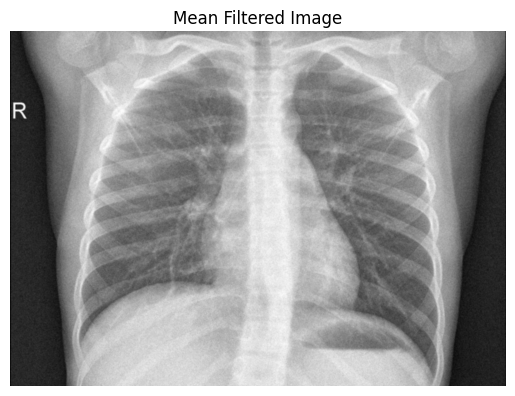

In [9]:
#Apply Mean Filter
mean_filtered = cv2.blur(noisy_img, (5,5))

plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis("off")


- `cv2.blur(noisy_img, (5,5))`  
  Applies a mean filter using a 5×5 kernel to smooth the image.

- Mean filtering averages neighboring pixel values to reduce noise.

- `plt.imshow(...)`  
  Displays the filtered image.

- `plt.title(...)`  
  Labels the result.

- `plt.axis("off")`  
  Removes axis markings.


(np.float64(-0.5), np.float64(2110.5), np.float64(1508.5), np.float64(-0.5))

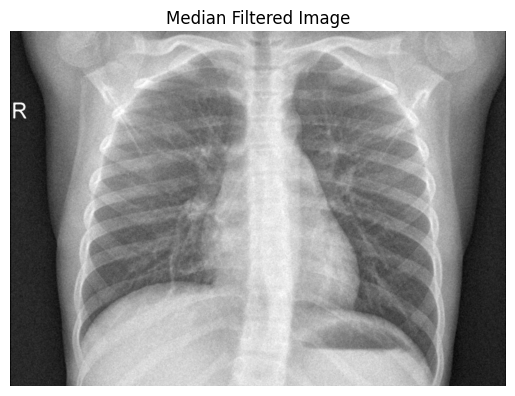

In [10]:
#Apply Median Filter
median_filtered = cv2.medianBlur(noisy_img, 5)

plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")


- `cv2.medianBlur(noisy_img, 5)`  
  Applies a median filter with a 5×5 neighborhood.

- Median filtering replaces each pixel with the median of its neighbors,
  which helps preserve edges while removing noise.

- `plt.imshow(...)`  
  Displays the median-filtered image.

- `plt.title(...)`  
  Labels the visualization.

- `plt.axis("off")`  
  Removes axes for clarity.


In [11]:
#Compute PSNR Values
psnr_noisy = psnr(gray, noisy_img)
psnr_mean = psnr(gray, mean_filtered)
psnr_median = psnr(gray, median_filtered)

print(f"PSNR (Noisy Image): {psnr_noisy:.2f}")
print(f"PSNR (Mean Filtered Image): {psnr_mean:.2f}")
print(f"PSNR (Median Filtered Image): {psnr_median:.2f}")


PSNR (Noisy Image): 22.23
PSNR (Mean Filtered Image): 33.16
PSNR (Median Filtered Image): 32.32


- `psnr(gray, noisy_img)`  
  Computes PSNR between the original and noisy image.

- `psnr(gray, mean_filtered)`  
  Computes PSNR after mean filtering.

- `psnr(gray, median_filtered)`  
  Computes PSNR after median filtering.

- `print(...)`  
  Displays PSNR values with two decimal precision for easy comparison.


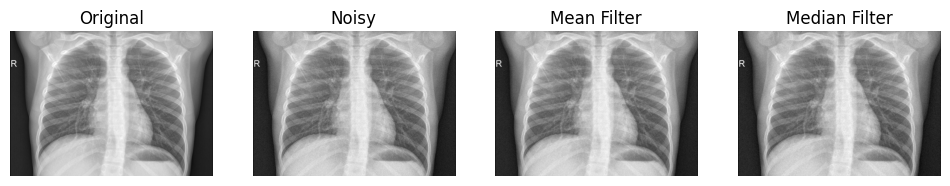

In [12]:
# Visual Comparison
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis("off")

plt.show()


- `plt.figure(figsize=(12,4))`  
  Creates a figure to hold multiple images.

- `plt.subplot(1,4,i)`  
  Arranges images in a single row with four columns.

- Each `plt.imshow(...)`  
  Displays a specific preprocessing stage.

- Each `plt.title(...)`  
  Labels the stage for comparison.

- `plt.show()`  
  Renders the complete figure.


### Observations

- Gaussian noise significantly degrades image clarity.
- Mean filtering reduces noise but introduces noticeable blurring.
- Median filtering preserves structural edges more effectively.
- Median filtering resulted in higher PSNR compared to mean filtering in this example.


### Limitations

- Noise characteristics vary across scanners and imaging protocols.
- PSNR evaluates numerical similarity but does not fully capture clinical interpretability.
- Noise removal alone is insufficient and must be combined with ROI extraction and modeling.
- Filter performance depends on noise type and parameter selection.
